# Correlation of World Happiness Index to Surveyed Factors

In [1]:
#Initialize Tools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import math
import geopandas as gpd


In [2]:
#Import Data
Happiness_Index = pd.read_csv("Resources/WHR_2005to2023_processed.csv")

In [3]:
#General Dataset Review / Analysis
Happiness_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2336 non-null   object 
 1   Regional Indicator                 2336 non-null   object 
 2   Year                               2336 non-null   int64  
 3   Life Ladder                        2336 non-null   float64
 4   Log GDP Per Capita                 2316 non-null   float64
 5   Social Support                     2323 non-null   float64
 6   Healthy Life Expectancy At Birth   2281 non-null   float64
 7   Freedom To Make Life Choices       2303 non-null   float64
 8   Generosity                         2263 non-null   float64
 9   Perceptions Of Corruption          2220 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [4]:
Happiness_Index.shape

(2336, 13)

In [5]:
Happiness_Index.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [6]:
Happiness_Index.isnull().sum()

Country Name                           0
Regional Indicator                     0
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      55
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                      161
Negative Affect                      153
Confidence In National Government    498
dtype: int64

## Create the Sub Dataframes as to Life Ladder and Graph

In [7]:
#Life Ladder as to GDP Per Capita
gdp_happiness =['Life Ladder', 'Log GDP Per Capita']

#Creating a dataframe that only contains these attributes
gdp_corrHappiness = Happiness_Index[gdp_happiness]

#Finding correlation
gdp_corrHappiness.corr()

,Life Ladder,Log GDP Per Capita
Life Ladder,1.00000,0.78485
Log GDP Per Capita,0.78485,1.00000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and GDP')

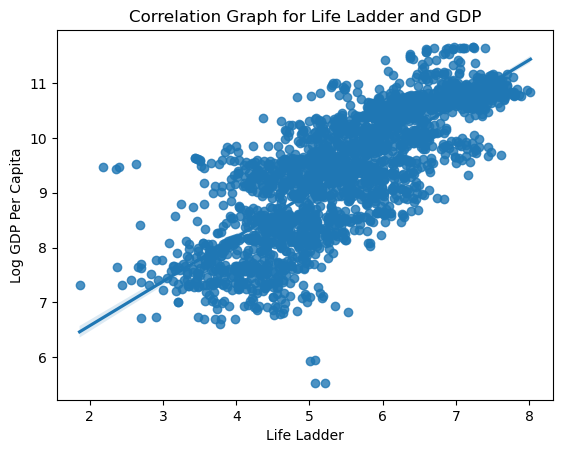

In [8]:
#Correlation graph Happiness vs GDP
sns.regplot(data = gdp_corrHappiness, x = 'Life Ladder', y = 'Log GDP Per Capita').set_title("Correlation Graph for Life Ladder and GDP")

In [9]:
#Life Ladder as to Social Support
social_happiness =['Life Ladder', 'Social Support']

#Creating a dataframe that only contains these attributes
social_corrHappiness = Happiness_Index[social_happiness]

#Finding correlation
social_corrHappiness.corr()

,Life Ladder,Social Support
Life Ladder,1.000000,0.728171
Social Support,0.728171,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Social Support')

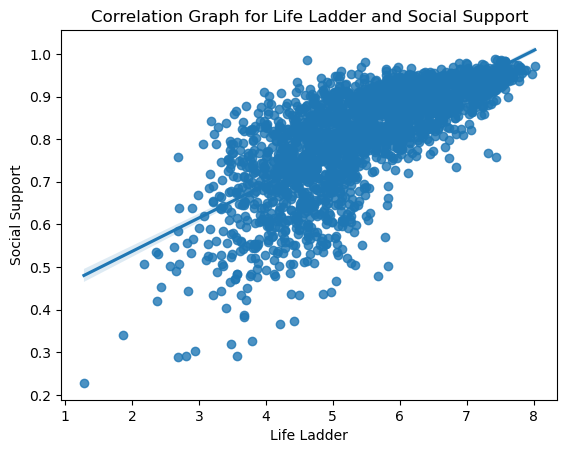

In [10]:
#Correlation graph Happiness vs Social Support
sns.regplot(data = social_corrHappiness, x = 'Life Ladder', y = 'Social Support').set_title("Correlation Graph for Life Ladder and Social Support")

In [11]:
#Life Ladder as to Life Expectancy
life_expectancy_happiness = ['Life Ladder', 'Healthy Life Expectancy At Birth']

#Creating a dataframe that only contains these attributes
life_expectancy_corrHappiness = Happiness_Index[life_expectancy_happiness]

#Finding correlation
life_expectancy_corrHappiness.corr()

,Life Ladder,Healthy Life Expectancy At Birth
Life Ladder,1.000000,0.714106
Healthy Life Expectancy At Birth,0.714106,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Healthy Life Expectancy At Birth')

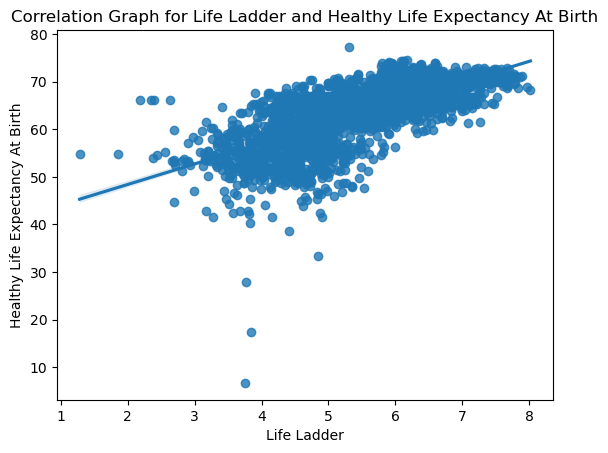

In [12]:
#Correlation graph Happiness vs Life Expectancy At Birth
sns.regplot(data = life_expectancy_corrHappiness, x = 'Life Ladder', y = 'Healthy Life Expectancy At Birth').set_title("Correlation Graph for Life Ladder and Healthy Life Expectancy At Birth")

In [13]:
#Life Ladder as to Freedom to Choose
freedom_happiness = ['Life Ladder', 'Freedom To Make Life Choices']

#Creating a dataframe that only contains these attributes
freedom_corrHappiness = Happiness_Index[freedom_happiness]

#Finding correlation
freedom_corrHappiness.corr()

,Life Ladder,Freedom To Make Life Choices
Life Ladder,1.000000,0.539667
Freedom To Make Life Choices,0.539667,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Freedom To Make Life Choices')

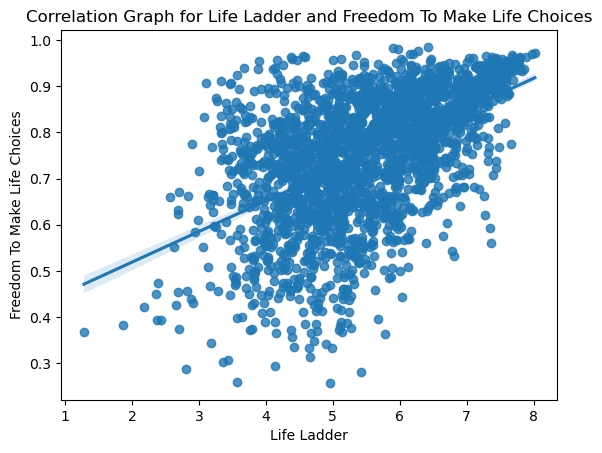

In [14]:
#Correlation graph Happiness vs Freedom To Make Life Choices
sns.regplot(data = freedom_corrHappiness, x = 'Life Ladder', y = 'Freedom To Make Life Choices').set_title("Correlation Graph for Life Ladder and Freedom To Make Life Choices")

In [15]:
#Life Ladder as to Generosity
generosity_happiness = ['Life Ladder', 'Generosity']

#Creating a dataframe that only contains these attributes
generosity_corrHappiness = Happiness_Index[generosity_happiness]

#Finding correlation
generosity_corrHappiness.corr()

,Life Ladder,Generosity
Life Ladder,1.000000,0.174507
Generosity,0.174507,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Generosity')

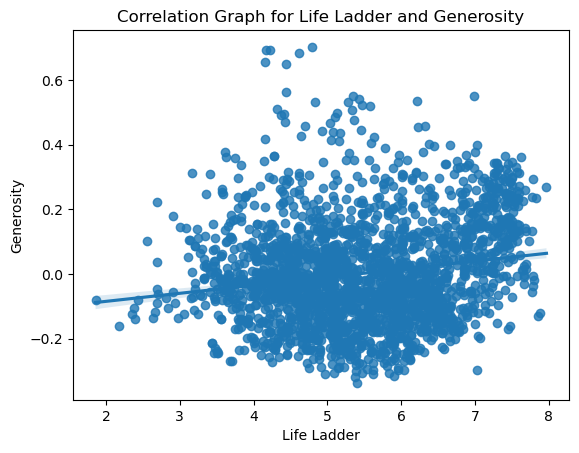

In [16]:
#Correlation graph Happiness vs Generosity
sns.regplot(data = generosity_corrHappiness, x = 'Life Ladder', y = 'Generosity').set_title("Correlation Graph for Life Ladder and Generosity")

In [17]:
#Life Ladder as to Corruption
corruption_happiness = ['Life Ladder', 'Perceptions Of Corruption']

#Creating a dataframe that only contains these attributes
corruption_corrHappiness = Happiness_Index[corruption_happiness]

#Finding correlation
corruption_corrHappiness.corr()

#Note: imputed corruption score of "1" in four (4) countries: Suadi Arabia, China, Bahrain, United Arab Emirates.

,Life Ladder,Perceptions Of Corruption
Life Ladder,1.000000,-0.434104
Perceptions Of Corruption,-0.434104,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Perceptions Of Corruption')

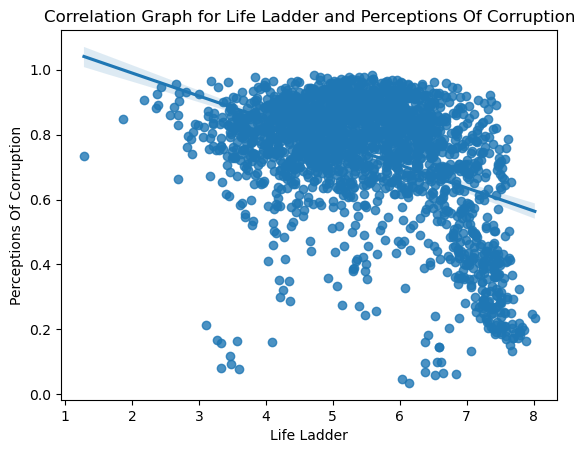

In [18]:
#Correlation graph Happiness vs Corruption
sns.regplot(data = corruption_corrHappiness, x = 'Life Ladder', y = 'Perceptions Of Corruption').set_title("Correlation Graph for Life Ladder and Perceptions Of Corruption")

In [19]:
#Life Ladder as to Positive Affect
positiveaffect_happiness = ['Life Ladder', 'Positive Affect']

#Creating a dataframe that only contains these attributes
positiveaffect_corrHappiness = Happiness_Index[positiveaffect_happiness]

#Finding correlation
positiveaffect_corrHappiness.corr()

,Life Ladder,Positive Affect
Life Ladder,1.000000,0.518207
Positive Affect,0.518207,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Positive Affect')

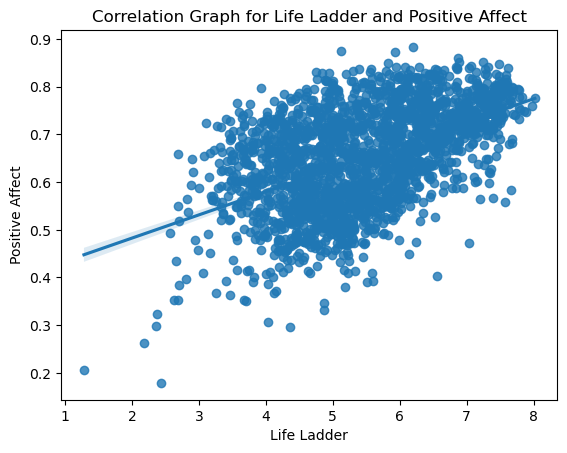

In [20]:
#Correlation graph Happiness vs Positive Affect
sns.regplot(data = positiveaffect_corrHappiness, x = 'Life Ladder', y = 'Positive Affect').set_title("Correlation Graph for Life Ladder and Positive Affect")

In [21]:
#Life Ladder as to Negative Affect
negativeaffect_happiness = ['Life Ladder', 'Negative Affect']

#Creating a dataframe that only contains these attributes
negativeaffect_corrHappiness = Happiness_Index[negativeaffect_happiness]

#Finding correlation
negativeaffect_corrHappiness.corr()

,Life Ladder,Negative Affect
Life Ladder,1.000000,-0.339992
Negative Affect,-0.339992,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Negative Affect')

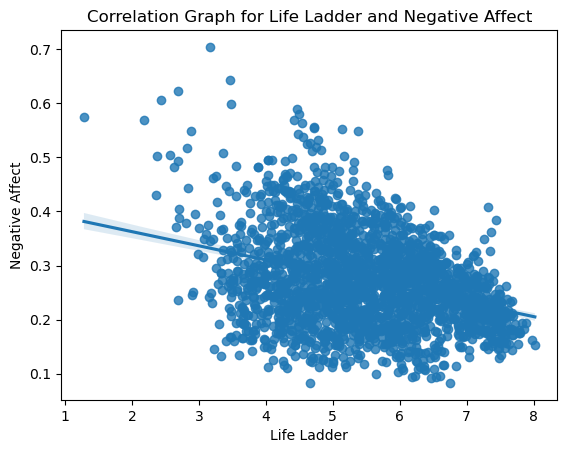

In [22]:
#Correlation graph Happiness vs Negative Affect
sns.regplot(data = negativeaffect_corrHappiness, x = 'Life Ladder', y = 'Negative Affect').set_title("Correlation Graph for Life Ladder and Negative Affect")

In [23]:
#Life Ladder as to Confidence
confidence_happiness = ['Life Ladder', 'Confidence In National Government']

#Creating a dataframe that only contains these attributes
confidence_corrHappiness = Happiness_Index[confidence_happiness]

#Finding correlation
confidence_corrHappiness.corr()

,Life Ladder,Confidence In National Government
Life Ladder,1.000000,-0.081887
Confidence In National Government,-0.081887,1.000000


Text(0.5, 1.0, 'Correlation Graph for Life Ladder and Confidence In National Government')

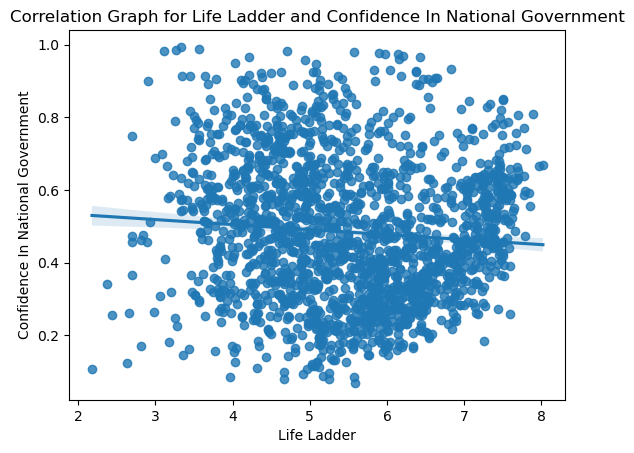

In [24]:
#Correlation graph Happiness vs Confidence
sns.regplot(data = confidence_corrHappiness, x = 'Life Ladder', y = 'Confidence In National Government').set_title("Correlation Graph for Life Ladder and Confidence In National Government")

In [25]:
happiness_corr1 = ['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']
happiness_corrGeneral = Happiness_Index[happiness_corr1]
happiness_corrGeneral.corr()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Life Ladder,1.000000,0.784850,0.728171,0.714106,0.539667,0.174507,-0.434104,0.518207,-0.339992,-0.081887
Log GDP Per Capita,0.784850,1.000000,0.686641,0.817510,0.371160,-0.008925,-0.358266,0.237986,-0.247560,-0.188351
Social Support,0.728171,0.686641,1.000000,0.601054,0.412813,0.065939,-0.224953,0.431139,-0.441800,-0.169573
Healthy Life Expectancy At Birth,0.714106,0.817510,0.601054,1.000000,0.377589,0.006522,-0.305198,0.223119,-0.140726,-0.178003
Freedom To Make Life Choices,0.539667,0.371160,0.412813,0.377589,1.000000,0.319620,-0.472306,0.578752,-0.275470,0.408533
Generosity,0.174507,-0.008925,0.065939,0.006522,0.319620,1.000000,-0.271760,0.307140,-0.080837,0.294399
Perceptions Of Corruption,-0.434104,-0.358266,-0.224953,-0.305198,-0.472306,-0.271760,1.000000,-0.280620,0.266267,-0.460789
Positive Affect,0.518207,0.237986,0.431139,0.223119,0.578752,0.307140,-0.280620,1.000000,-0.330236,0.123241
Negative Affect,-0.339992,-0.247560,-0.441800,-0.140726,-0.275470,-0.080837,0.266267,-0.330236,1.000000,-0.125631
Confidence In National Government,-0.081887,-0.188351,-0.169573,-0.178003,0.408533,0.294399,-0.460789,0.123241,-0.125631,1.000000


C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


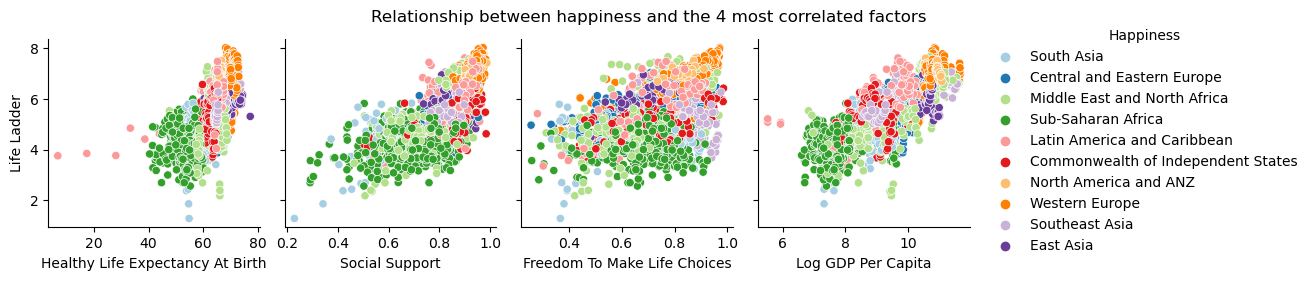

In [26]:
#It appears that GDP, Life Expectancy, Social Support, and Freedom to make choices are the four most influencial factors to happiness.
#Conducting more analysis
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Healthy Life Expectancy At Birth', 'Social Support','Freedom To Make Life Choices', 'Log GDP Per Capita'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and the 4 most correlated factors", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


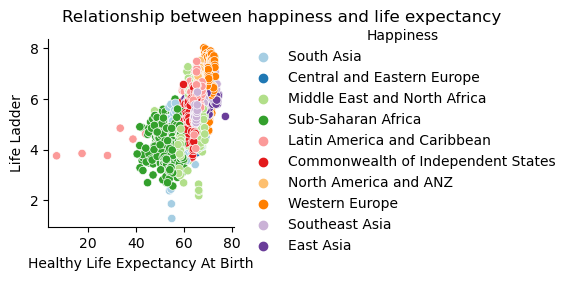

In [27]:
#It appears that GDP, Life Expectancy, Social Support, and Freedom to make choices are the four most influencial factors to happiness.
#Conducting more analysis
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Healthy Life Expectancy At Birth'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and life expectancy", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


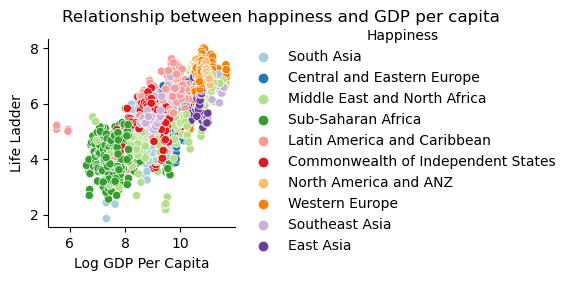

In [28]:
#It appears that GDP, Life Expectancy, Social Support, and Freedom to make choices are the four most influencial factors to happiness.
#Conducting more analysis
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Log GDP Per Capita'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and GDP per capita", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


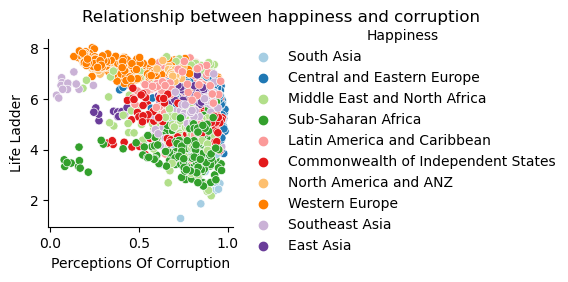

In [29]:
#It appears that GDP, Life Expectancy, Social Support, and Freedom to make choices are the four most influencial factors to happiness.
#Conducting more analysis
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Perceptions Of Corruption'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and corruption", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


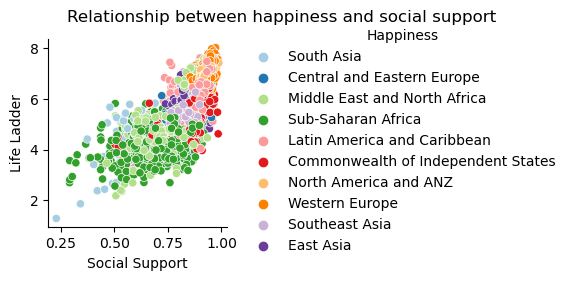

In [30]:
#It appears that GDP, Life Expectancy, Social Support, and Freedom to make choices are the four most influencial factors to happiness.
#Conducting more analysis
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Social Support'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and social support", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


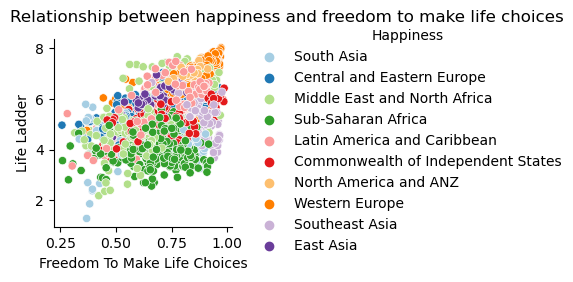

In [31]:
#It appears that GDP, Life Expectancy, Social Support, and Freedom to make choices are the four most influencial factors to happiness.
#Conducting more analysis
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Freedom To Make Life Choices'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and freedom to make life choices", y=1.08)
g._legend.set_title("Happiness")

## Creating wold map of happiness for 2023

In [32]:
#set sns style
sns.set_style("whitegrid")

In [33]:
Happiness2023 = pd.read_csv("Resources/2023.csv")

<Axes: >

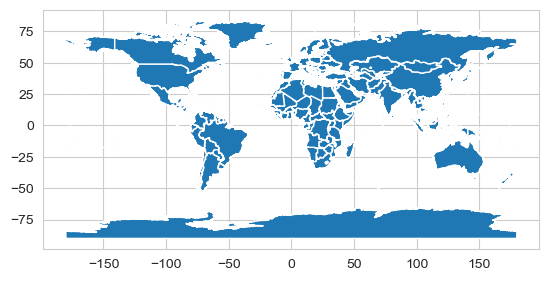

In [34]:
map_df = gpd.read_file('Resources/ne_10m_admin_0_countries.shp')
map_df.plot()

In [35]:
#for col in map_df:
 #   print(col)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

In [36]:
map_df = map_df.replace({'Russian Federation':'Russia',
                        'Trinidad and Tobago': 'Trinidad & Tobago',
                        "Côte d'Ivoire": 'Ivory Coast',
                        'Congo': 'Congo (Brazzaville)',
                        'Congo DRC':'Congo (Kinshasa)',
                        'Palestinian Territory':'Palestinian Territories'})

In [37]:
Happiness2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [38]:
Happiness2023 = Happiness2023.rename(index = str, columns = {'Country name': "Country", 'Ladder score': "Score"})
Happiness2023map = Happiness2023[['Country', 'Score']]

Happiness2023map


,Country,Score
0,Finland,7.804
1,Denmark,7.586
2,Iceland,7.530
3,Israel,7.473
4,Netherlands,7.403
...,...,...
132,Congo (Kinshasa),3.207
133,Zimbabwe,3.204
134,Sierra Leone,3.138
135,Lebanon,2.392


In [39]:
merged = map_df.set_index('SOVEREIGNT').join(Happiness2023map.set_index('Country'))

merged

,featurecla,scalerank,LABELRANK,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Score
SOVEREIGNT,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Admin-0 country,0,3,AFG,0,2,Sovereign country,1,Afghanistan,AFG,...,None,None,None,None,None,None,None,None,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",1.859
Albania,Admin-0 country,0,6,ALB,0,2,Sovereign country,1,Albania,ALB,...,None,None,None,None,None,None,None,None,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",5.277
Algeria,Admin-0 country,0,3,DZA,0,2,Sovereign country,1,Algeria,DZA,...,None,None,None,None,None,None,None,None,"POLYGON ((-4.82161 24.99506, -4.99519 25.10209...",5.329
Andorra,Admin-0 country,0,6,AND,0,2,Sovereign country,1,Andorra,AND,...,None,None,None,None,None,None,None,None,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",NaN
Angola,Admin-0 country,0,3,AGO,0,2,Sovereign country,1,Angola,AGO,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Admin-0 country,0,7,SAH,0,2,Indeterminate,1,Western Sahara,SAH,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.81703 27.66146, -8.81654 27.66147...",NaN
Yemen,Admin-0 country,0,3,YEM,0,2,Sovereign country,1,Yemen,YEM,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((51.97861 18.99564, 51.98569 18...",NaN
Zambia,Admin-0 country,0,3,ZMB,0,2,Sovereign country,1,Zambia,ZMB,...,None,None,None,None,None,None,None,None,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629...",3.982


In [40]:
print(merged.Score.isnull().sum())

88


In [41]:
Happiness2023map = Happiness2023map.set_index('Country').T.to_dict('list')
Happiness2023map

{'Finland': [7.804],
 'Denmark': [7.586],
 'Iceland': [7.53],
 'Israel': [7.473],
 'Netherlands': [7.403],
 'Sweden': [7.395],
 'Norway': [7.315],
 'Switzerland': [7.24],
 'Luxembourg': [7.228],
 'New Zealand': [7.123],
 'Austria': [7.097],
 'Australia': [7.095],
 'Canada': [6.961],
 'Ireland': [6.911],
 'United States': [6.894],
 'Germany': [6.892],
 'Belgium': [6.859],
 'Czechia': [6.845],
 'United Kingdom': [6.796],
 'Lithuania': [6.763],
 'France': [6.661],
 'Slovenia': [6.65],
 'Costa Rica': [6.609],
 'Romania': [6.589],
 'Singapore': [6.587],
 'United Arab Emirates': [6.571],
 'Taiwan Province of China': [6.535],
 'Uruguay': [6.494],
 'Slovakia': [6.469],
 'Saudi Arabia': [6.463],
 'Estonia': [6.455],
 'Spain': [6.436],
 'Italy': [6.405],
 'Kosovo': [6.368],
 'Chile': [6.334],
 'Mexico': [6.33],
 'Malta': [6.3],
 'Panama': [6.265],
 'Poland': [6.26],
 'Nicaragua': [6.259],
 'Latvia': [6.213],
 'Bahrain': [6.173],
 'Guatemala': [6.15],
 'Kazakhstan': [6.144],
 'Serbia': [6.144],
 

In [48]:
for i in range (len(merged)):
    if math.isnan(merged['Score'][i]):
        if (str(merged['NOTE_ADM0'][i])) in Happiness2023map:
            merged['Score'][i] = float(df[str(merged['NOTE_ADM0'][i])][0])

merged


,featurecla,scalerank,LABELRANK,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Score
SOVEREIGNT,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Admin-0 country,0,3,AFG,0,2,Sovereign country,1,Afghanistan,AFG,...,None,None,None,None,None,None,None,None,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",1.859
Albania,Admin-0 country,0,6,ALB,0,2,Sovereign country,1,Albania,ALB,...,None,None,None,None,None,None,None,None,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",5.277
Algeria,Admin-0 country,0,3,DZA,0,2,Sovereign country,1,Algeria,DZA,...,None,None,None,None,None,None,None,None,"POLYGON ((-4.82161 24.99506, -4.99519 25.10209...",5.329
Andorra,Admin-0 country,0,6,AND,0,2,Sovereign country,1,Andorra,AND,...,None,None,None,None,None,None,None,None,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",NaN
Angola,Admin-0 country,0,3,AGO,0,2,Sovereign country,1,Angola,AGO,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((13.07370 -4.63532, 13.06533 -4...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,Admin-0 country,0,7,SAH,0,2,Indeterminate,1,Western Sahara,SAH,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.81703 27.66146, -8.81654 27.66147...",NaN
Yemen,Admin-0 country,0,3,YEM,0,2,Sovereign country,1,Yemen,YEM,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((51.97861 18.99564, 51.98569 18...",NaN
Zambia,Admin-0 country,0,3,ZMB,0,2,Sovereign country,1,Zambia,ZMB,...,None,None,None,None,None,None,None,None,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629...",3.982


In [49]:
print(merged.Score.isnull())

SOVEREIGNT
Afghanistan       False
Albania           False
Algeria           False
Andorra            True
Angola             True
                  ...  
Western Sahara     True
Yemen              True
Zambia            False
Zimbabwe          False
eSwatini           True
Name: Score, Length: 258, dtype: bool


In [50]:
variable = 'Score'
vmin, vmax = 1.7, 8

<Axes: >

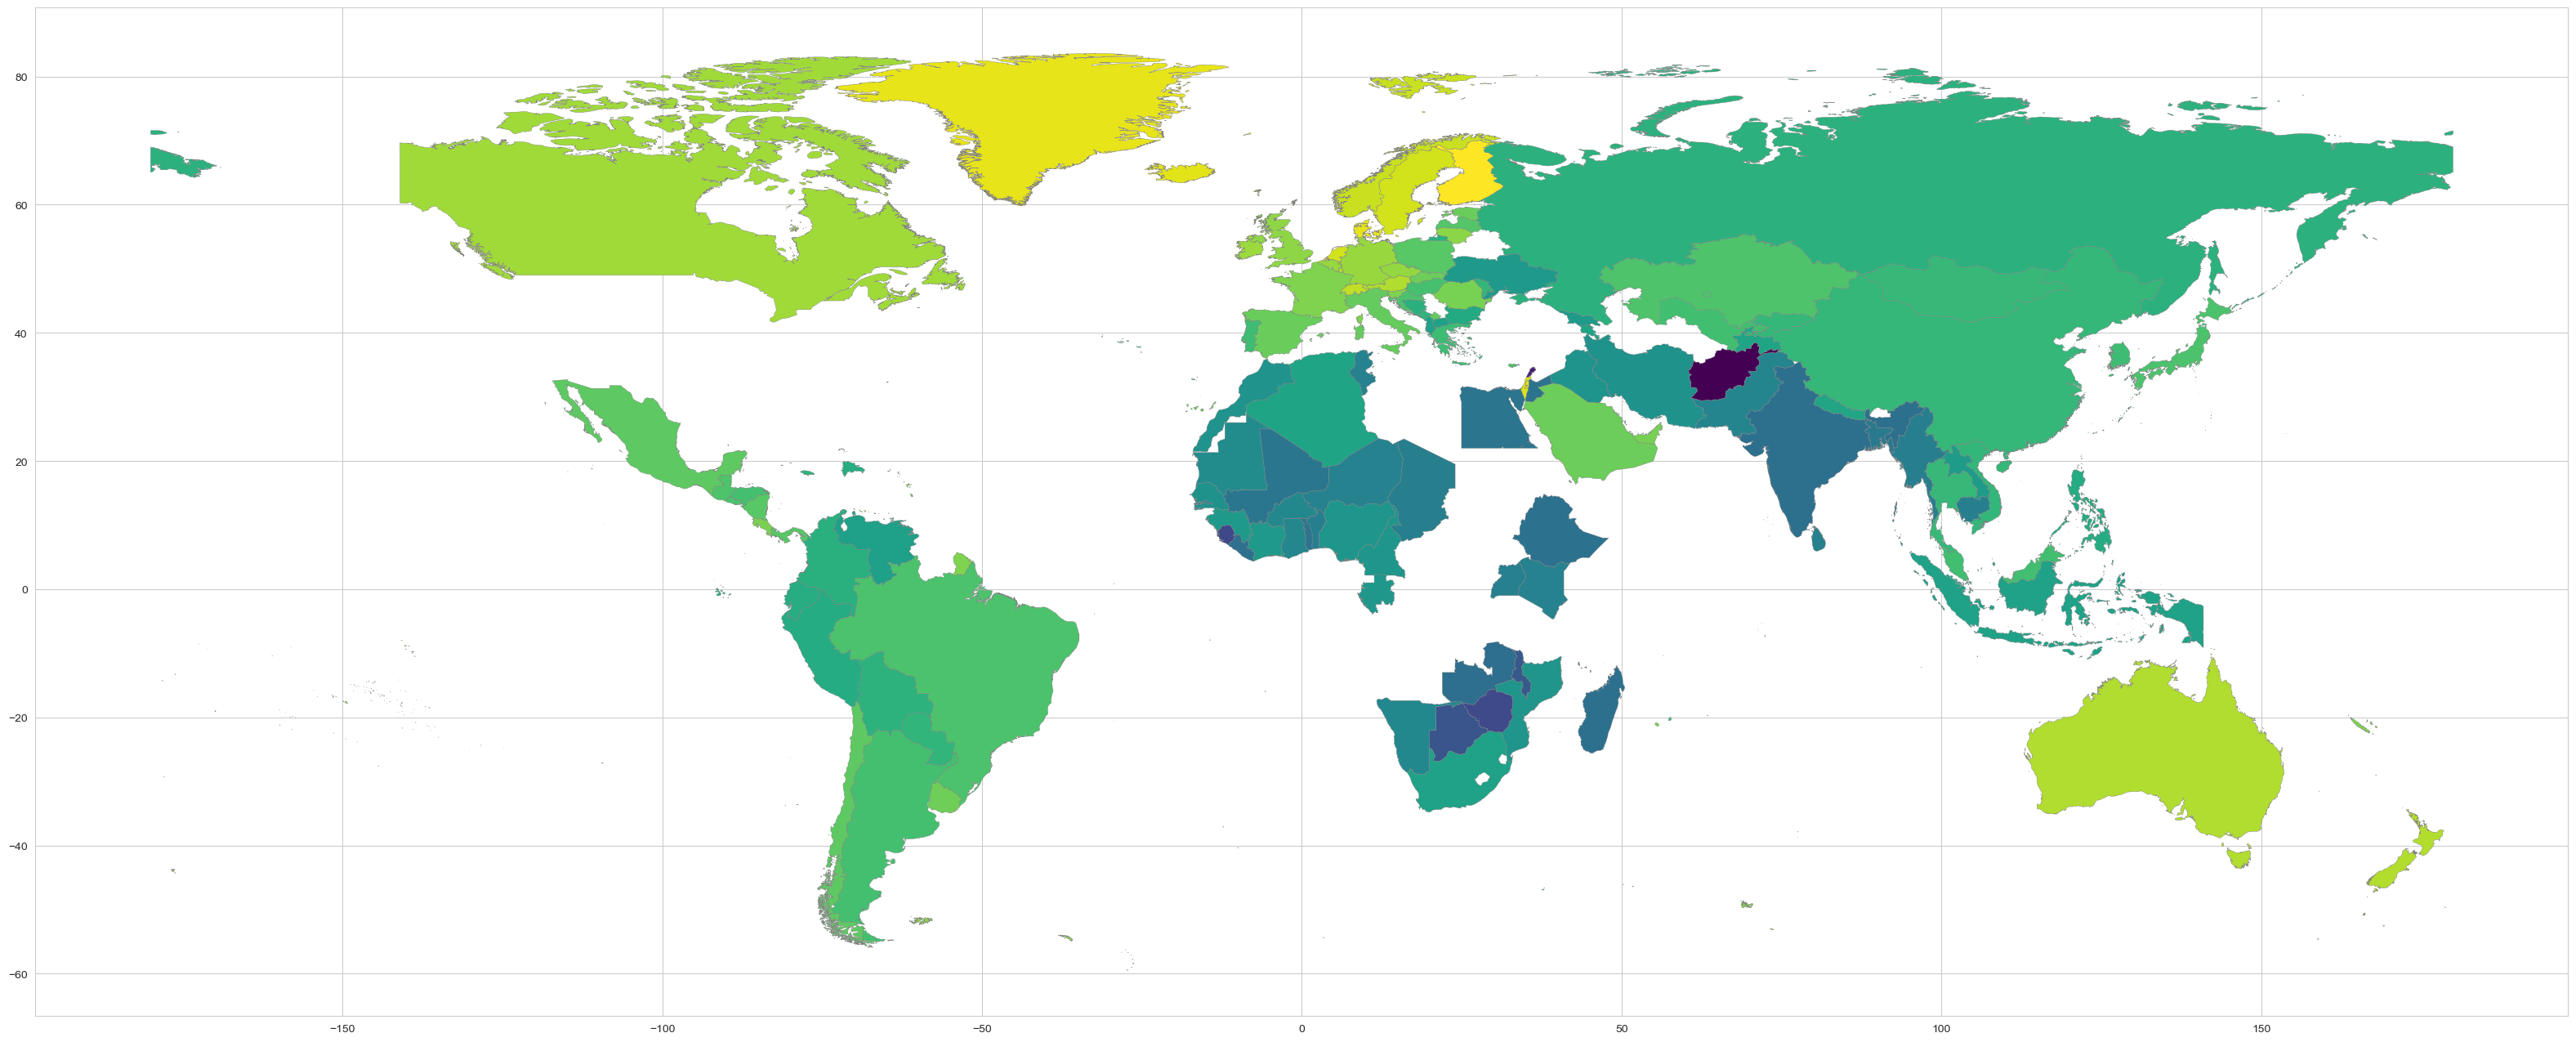

In [51]:
fig,ax = plt.subplots(1,figsize = (40,24))

merged.plot(column = variable, cmap = 'viridis', linewidth = 0.3, ax=ax, edgecolor = '0.5')

C:\Users\c_mar\AppData\Local\Temp\ipykernel_13540\901285897.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: title={'center': 'World Happiness Score'}>

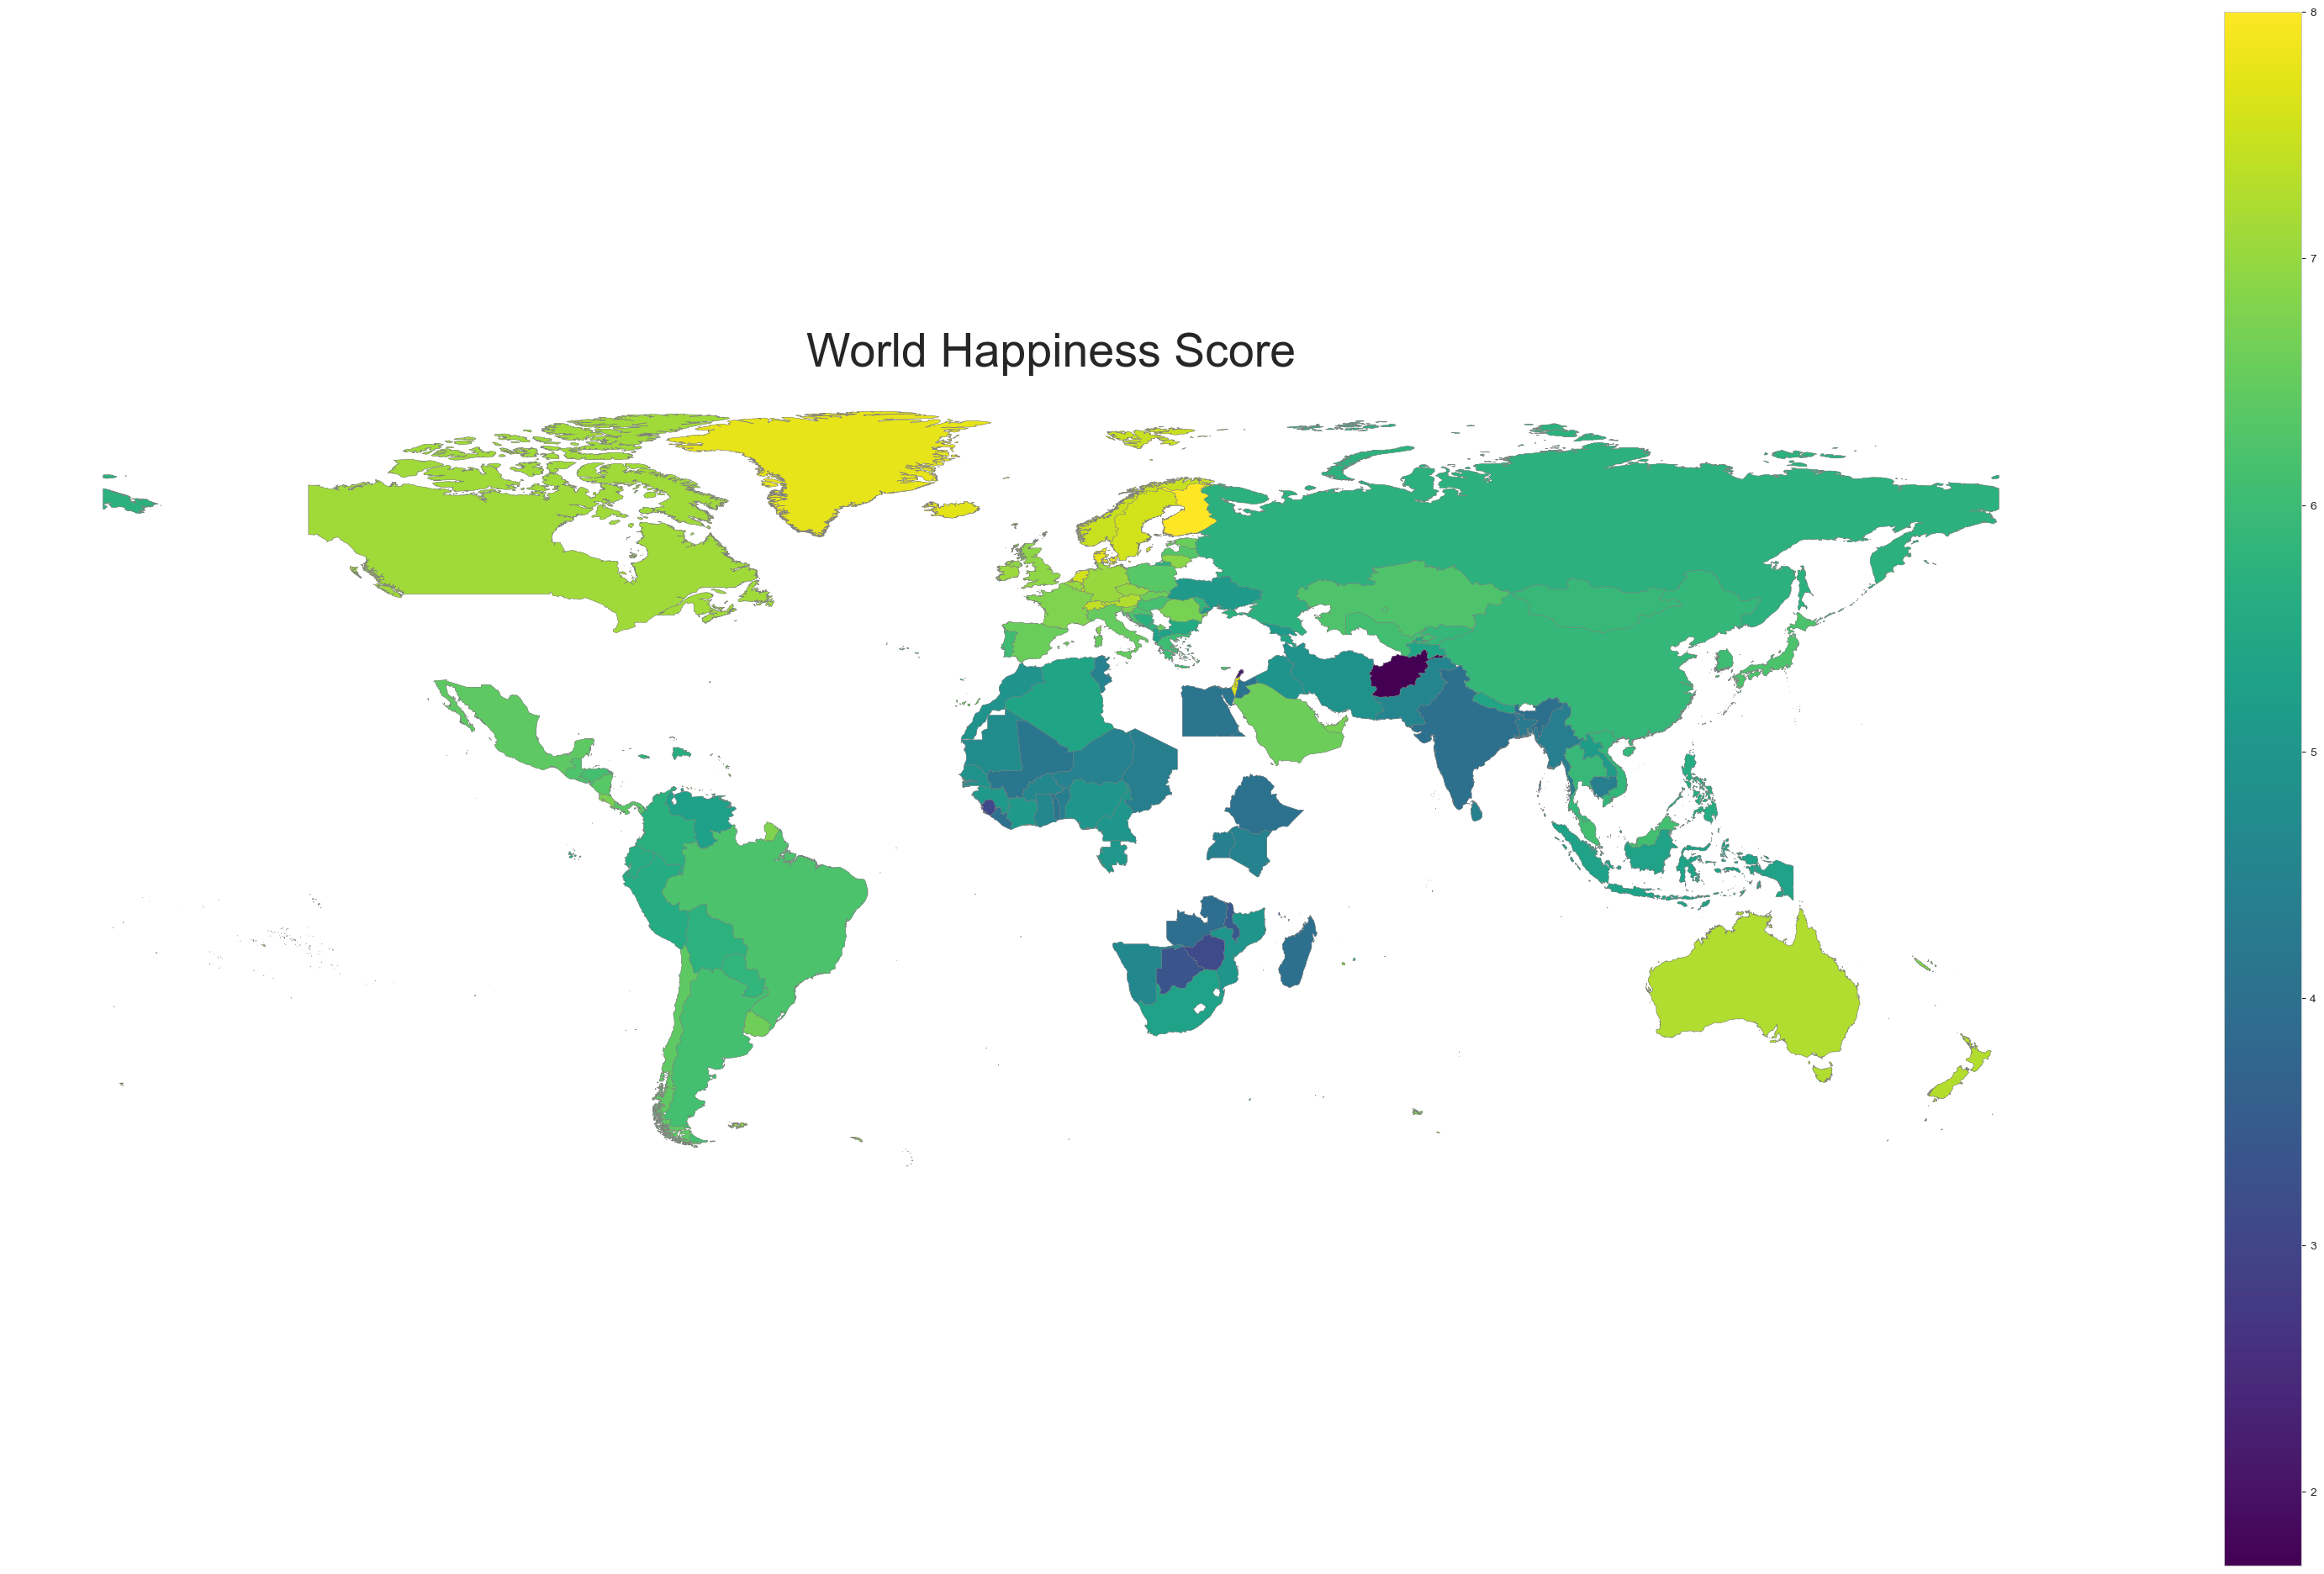

In [52]:
fig,ax = plt.subplots(1,figsize = (40,24))

merged.plot(column = variable, cmap = 'viridis', linewidth = 0.3, ax=ax,edgecolor = '0.5')

ax.axis('off')

ax.set_title('World Happiness Score',fontdict = {'fontsize':'40'})


sm = plt.cm.ScalarMappable(cmap='viridis',norm = plt.Normalize(vmin = vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

merged.plot(column = variable, cmap = 'viridis', linewidth = 0.3, ax=ax,edgecolor = '0.5')

In [47]:
Happiness2023map.to_csv('Happiness2023_map.csv')

AttributeError: 'dict' object has no attribute 'to_csv'

In [ ]:
merged.to_csv('merged.csv', index=False)